In [1]:
#new way to load data
# the basic cuts are already in the select leaf
%matplotlib inline 
srcpwd = '/Users/romain/work/Auger/EASIER/LPSC/monitoring/script'
utilspath =srcpwd + '/utils/'
sys.path.append(utilspath)
import utils
classpath = srcpwd + '/classes/'
sys.path.append(classpath)
import dataset
datafolder = '/Users/romain/work/Auger/EASIER/LPSC/monitoring/data/'
#fname = 'Antenna_2014-01-01_2014-01-30.root'
fname = 'Antenna_2014-01-01_2014-12-31.root'                                                                                                        
file = datafolder + fname

data = dataset.Dataset(file)
data.loaddata()

pfile = '/Users/romain/work/Auger/EASIER/LPSC/suntransit/data/period/controlperiod_Tsys_50K_below_2adc.txt'
data.loadperiod(pfile)                                                                                                                              
data.selectleafs(343)

Welcome to ROOTaaS 6.06/00


(-100, 100)

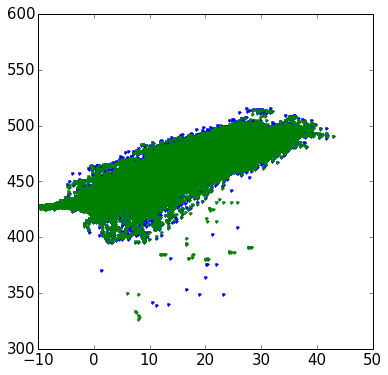

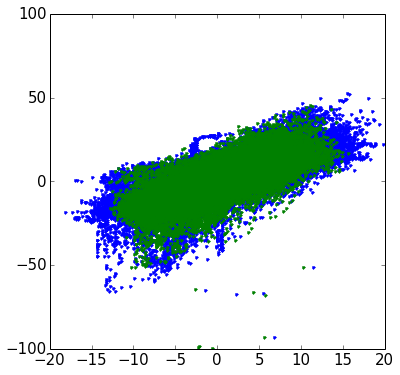

In [20]:
fdata = data.getnewdataset()
fdata.filterHP(1.5)
fdata100 = data.getnewdataset()
fdata100.filterHP(10)

sdata = data.getnewdataset()
sdata.slidingwindow(5)

fig0 = plt.figure(figsize=(6,6))
plt.plot(data.tempLL,data.radio,'.')
plt.plot(sdata.tempLL,sdata.radio,'.')
plt.ylim(300,600)
fig = plt.figure(figsize=(6,6))
plt.plot(fdata100.tempLL,fdata100.radio,'.')
plt.plot(fdata.tempLL,fdata.radio,'.')
#plt.plot(fdata100.tempLL,fdata100.radio,'.')

plt.ylim(-100,100)

74962
74952


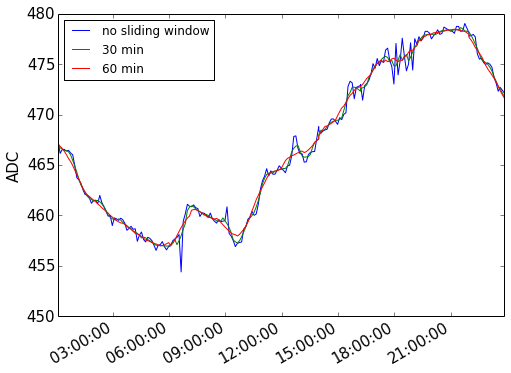

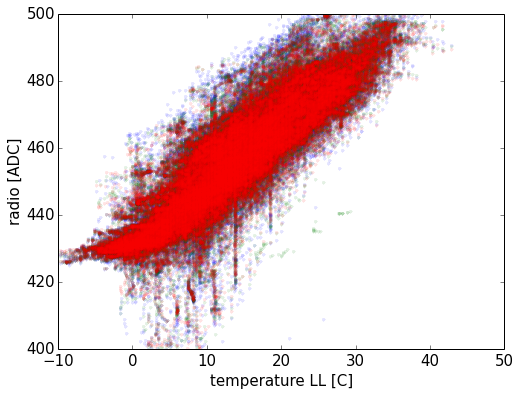

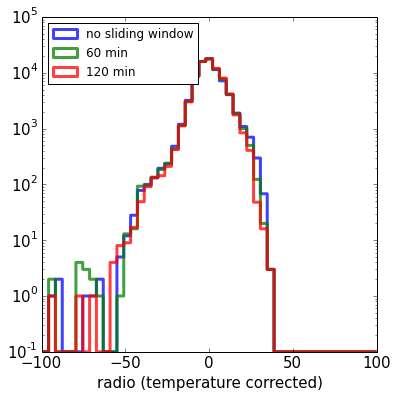

In [42]:
fdata = data.getnewdataset()
fdata.filterHP(1.5)
fdata100 = data.getnewdataset()
fdata100.filterHP(10)

sdata2 = data.getnewdataset()
sdata2.slidingwindow(2)

sdata5 = data.getnewdataset()
sdata5.slidingwindow(5)

sdata10 = data.getnewdataset()
sdata10.slidingwindow(10)

sdata20 = data.getnewdataset()
sdata20.slidingwindow(20)

sdata100 = data.getnewdataset()
sdata100.slidingwindow(100)



import datetime
month =1
#data.filterHP(1)
#data.slidingwindow(5)
fig  = plt.figure(figsize=(8,6))
for d in range(2,3):
    t0 = utils.datettotimestamp(datetime.datetime(2014,month,d,00,00,00))
    t1 = utils.datettotimestamp(datetime.datetime(2014,month,d,23,59,00))
    daydata = data.getnewdataset(t0,t1)
    daydata2 = sdata2.getnewdataset(t0,t1)
    daydata5 = sdata5.getnewdataset(t0,t1)
    daydata10 = sdata10.getnewdataset(t0,t1)
    daydata20 = sdata20.getnewdataset(t0,t1)
    daydata100 = sdata100.getnewdataset(t0,t1)


    #  print daydata.hhmm
    plt.plot(daydata.date,daydata.radio,label='no sliding window')
#    plt.plot(daydata2.date,daydata2.radio,label='12 min')
    plt.plot(daydata5.date,daydata5.radio,label='30 min')
    plt.plot(daydata10.date,daydata10.radio,label='60 min')
#    plt.plot(daydata20.date,daydata20.radio,label='120 min')
#    plt.plot(daydata100.date,daydata100.radio,label='600 min')
 #   print daydata100.date
plt.gcf().autofmt_xdate()
plt.ylabel('ADC')
plt.legend(loc=2)

fig1 = plt.figure(figsize=(8,6))

plt.plot(data.tempLL, data.radio,'.',alpha=0.1)
plt.plot(sdata10.tempLL, sdata10.radio,'.',alpha=0.1)
plt.plot(sdata20.tempLL, sdata20.radio,'.',alpha=0.1)
plt.xlabel('temperature LL [C]')
plt.ylabel('radio [ADC]')
plt.ylim(400,500)
data.tempcorrection(1)
sdata10.tempcorrection(1)
sdata20.tempcorrection(1)

figdist = plt.figure(figsize = (6,6))
bins = np.linspace(-100,100,50)
n1, bins1, patches1 = plt.hist(data.radioc, bins=bins, histtype='step', lw=3, alpha=0.75,log=True,label='no sliding window')
n2, bins2, patches2 = plt.hist(sdata10.radioc, bins=bins, histtype='step',lw=3, alpha=0.75,log=True,label='60 min')
n0, bins0, patches0 = plt.hist(sdata20.radioc, bins=bins, histtype='step', lw=3, alpha=0.75,log=True,label='120 min')
plt.xlabel('radio (temperature corrected)')
print len(sdata10.radioc)
print len(sdata20.radioc)
plt.legend(loc=2)
#plt.ylim(400,500)
#plt.plot(daydata2.tempLL, daydata2.radio,'.')

74970
74970


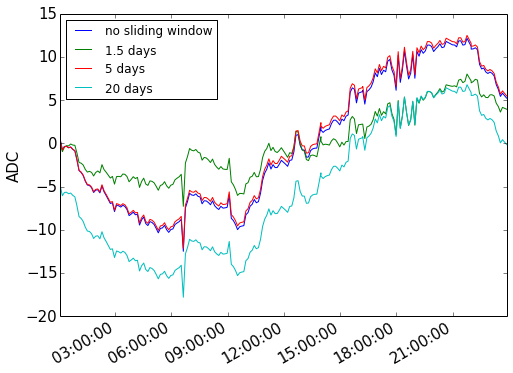

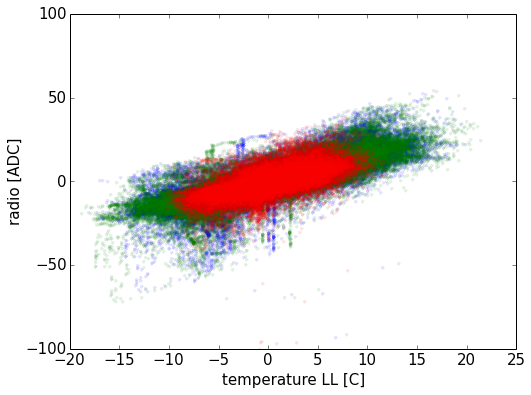

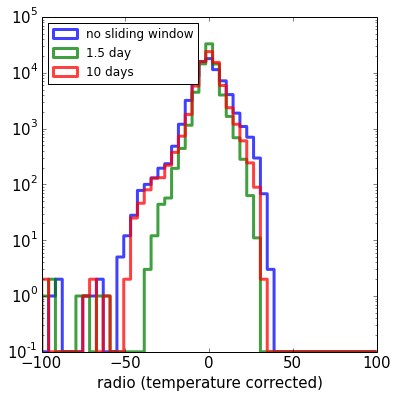

In [92]:
fdata = data.getnewdataset()
fdata.filterHP(1)

fdata2 = data.getnewdataset()
fdata2.filterHP(2)

fdata5 = data.getnewdataset()
fdata5.filterHP(5)

fdata10 = data.getnewdataset()
fdata10.filterHP(10)

fdata20 = data.getnewdataset()
fdata20.filterHP(20)

fdata100 = data.getnewdataset()
fdata100.filterHP(100)



import datetime
month =1
#data.filterHP(1)
#data.slidingwindow(5)
fig  = plt.figure(figsize=(8,6))
for d in range(2,3):
    t0 = utils.datettotimestamp(datetime.datetime(2014,month,d,00,00,00))
    t1 = utils.datettotimestamp(datetime.datetime(2014,month,d,23,59,00))
    daydata = data.getnewdataset(t0,t1)
    daydata1_5 = fdata.getnewdataset(t0,t1)
    daydata2 = fdata2.getnewdataset(t0,t1)
    daydata5 = fdata5.getnewdataset(t0,t1)
    daydata10 = fdata10.getnewdataset(t0,t1)
    daydata20 = fdata20.getnewdataset(t0,t1)
    daydata100 = fdata100.getnewdataset(t0,t1)


    #  print daydata.hhmm
    plt.plot(daydata.date,daydata.radio-np.mean(daydata.radio),label='no sliding window')
#    plt.plot(daydata2.date,daydata2.radio,label='2 days')
    plt.plot(daydata1_5.date,daydata1_5.radio,label='1.5 days')
    plt.plot(daydata5.date,daydata5.radio,label='5 days')
#    plt.plot(daydata10.date,daydata10.radio,label='10 days')
    plt.plot(daydata20.date,daydata20.radio,label='20 days')
#    plt.plot(daydata100.date,daydata100.radio,label='600 min')
 #   print daydata100.date
plt.gcf().autofmt_xdate()
plt.ylabel('ADC')
plt.legend(loc=2)

fig1 = plt.figure(figsize=(8,6))

#plt.plot(data.tempLL, data.radio,'.',alpha=0.1)

plt.plot(fdata10.tempLL, fdata10.radio,'.',alpha=0.1)
plt.plot(fdata20.tempLL, fdata20.radio,'.',alpha=0.1)
plt.plot(fdata.tempLL, fdata.radio,'.',alpha=0.1)
plt.xlabel('temperature LL [C]')
plt.ylabel('radio [ADC]')
plt.ylim(-100,100)
data.tempcorrection(1)
fdata.tempcorrection(1)
fdata10.tempcorrection(1)
fdata20.tempcorrection(1)

figdist = plt.figure(figsize = (6,6))
bins = np.linspace(-100,100,50)
n1, bins1, patches1 = plt.hist(data.radioc, bins=bins, histtype='step', lw=3, alpha=0.75,log=True,label='no sliding window')
n2, bins2, patches2 = plt.hist(fdata.radioc, bins=bins, histtype='step',lw=3, alpha=0.75,log=True,label='1.5 day')
n3, bins3, patches3 = plt.hist(fdata10.radioc, bins=bins, histtype='step',lw=3, alpha=0.75,log=True,label='10 days')
#n0, bins0, patches0 = plt.hist(fdata20.radioc, bins=bins, histtype='step', lw=3, alpha=0.75,log=True,label='20 days')
plt.xlabel('radio (temperature corrected)')
print len(fdata10.radioc)
print len(fdata20.radioc)
plt.legend(loc=2)
#plt.ylim(400,500)
#plt.plot(daydata2.tempLL, daydata2.radio,'.')

(-20, 20)

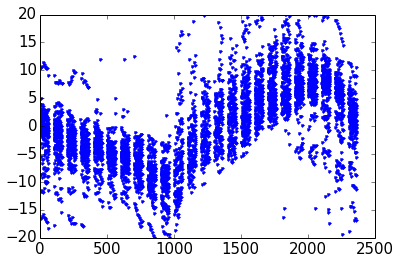

In [91]:
cond = np.where( (data.humLL >0 ) & (data.humLL < 50))
fdata = data.getnewdatasetcond(cond)
fdata.filterHP(1)
month = 1
t0 = utils.datettotimestamp(datetime.datetime(2014,month,1,00,00,00))
t1 = utils.datettotimestamp(datetime.datetime(2014,month,30,23,59,00))
fdata = fdata.getnewdataset(t0,t1)
plt.plot(fdata.hhmm, fdata.radio,'.')

plt.ylim(-20,20)